<a href="https://colab.research.google.com/github/aKedar008/Python_Practice/blob/main/Uber_dataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set (style = "whitegrid")

In [2]:
!pip install gdown

In [3]:
import gdown

In [4]:
file_id = "1zeewyef5Czg1B5PEAeFkvihPaqDtzmdG"
download_url = f"https://drive.google.com/uc?id={file_id}"


In [5]:
output_file = "uber_dataset.csv"

In [6]:
gdown.download(download_url, output_file, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1zeewyef5Czg1B5PEAeFkvihPaqDtzmdG
From (redirected): https://drive.google.com/uc?id=1zeewyef5Czg1B5PEAeFkvihPaqDtzmdG&confirm=t&uuid=83da8183-b300-46d2-a8b5-a1d675c42ecd
To: /content/uber_dataset.csv
100%|██████████| 754M/754M [00:13<00:00, 56.8MB/s]


'uber_dataset.csv'

In [7]:
data = pd.read_csv("uber_dataset.csv")

In [8]:
data.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,gst,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.9,238,239,1.0,283.73,141.87,23.64,69.52,0.0,14.18,532.93,118.22
1,1,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.9,239,238,1.0,331.01,141.87,23.64,70.93,0.0,14.18,581.63,118.22
2,1,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,1.0,238,238,1.0,283.73,141.87,23.64,47.29,0.0,14.18,510.71,118.22
3,1,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,1.3,238,151,1.0,260.08,23.64,23.64,64.31,0.0,14.18,385.87,0.00
4,1,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,193,193,2.0,165.51,23.64,23.64,0.00,0.0,14.18,226.98,0.00


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500000 entries, 0 to 6499999
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   PULocationID           int64  
 6   DOLocationID           int64  
 7   payment_type           float64
 8   fare_amount            float64
 9   extra                  float64
 10  gst                    float64
 11  tip_amount             float64
 12  tolls_amount           float64
 13  improvement_surcharge  float64
 14  total_amount           float64
 15  congestion_surcharge   float64
dtypes: float64(11), int64(3), object(2)
memory usage: 793.5+ MB


In [10]:
print("missing values: \n", data.isnull().sum())

missing values: 
 VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          79229
trip_distance                0
PULocationID                 0
DOLocationID                 0
payment_type             79229
fare_amount                  0
extra                        0
gst                          0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
dtype: int64


In [11]:
data.describe()

,VendorID,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,gst,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,6500000.0,6.420771e+06,6.500000e+06,6.500000e+06,6.500000e+06,6.420771e+06,6.500000e+06,6.500000e+06,6.500000e+06,6.500000e+06,6.500000e+06,6.500000e+06,6.500000e+06,6.500000e+06
mean,1.0,1.515719e+00,4.714353e+00,1.645881e+02,1.625559e+02,1.270356e+00,6.020947e+02,5.252278e+01,2.327745e+01,1.033724e+02,1.655467e+01,1.408472e+01,8.839614e+02,1.074429e+02
std,0.0,1.151972e+00,1.342376e+02,6.562886e+01,6.996151e+01,4.741247e-01,5.762674e+02,5.952419e+01,3.484334e+00,1.302581e+02,8.355223e+01,1.601577e+00,6.993049e+02,3.500532e+01
min,1.0,0.000000e+00,-4.900000e+01,1.000000e+00,1.000000e+00,1.000000e+00,-5.854230e+04,-1.276770e+03,-2.364000e+01,-4.303190e+03,-1.690060e+03,-1.418000e+01,-5.874563e+04,-1.182200e+02
25%,1.0,1.000000e+00,1.500000e+00,1.320000e+02,1.130000e+02,1.000000e+00,3.073700e+02,0.000000e+00,2.364000e+01,0.000000e+00,0.000000e+00,1.418000e+01,5.277300e+02,1.182200e+02
50%,1.0,1.000000e+00,2.600000e+00,1.620000e+02,1.620000e+02,1.000000e+00,4.255900e+02,2.364000e+01,2.364000e+01,9.221000e+01,0.000000e+00,1.418000e+01,6.762200e+02,1.182200e+02
75%,1.0,2.000000e+00,4.700000e+00,2.340000e+02,2.340000e+02,2.000000e+00,6.620300e+02,1.182200e+02,2.364000e+01,1.352300e+02,0.000000e+00,1.418000e+01,9.363000e+02,1.182200e+02
max,1.0,9.000000e+00,3.363841e+05,2.650000e+02,2.650000e+02,5.000000e+00,2.016825e+05,5.343990e+03,1.456460e+03,5.201658e+04,4.305554e+04,1.418000e+01,2.018385e+05,1.300400e+02


In [12]:
data = data.dropna()
data = data.drop_duplicates()
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'], format="%m/%d/%Y %I:%M:%S %p")
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'], format="%m/%d/%Y %I:%M:%S %p")


In [13]:
# 1. Trip duration in hours
data['trip_duration_hrs'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 3600
# 2. Driver revenue (fare + tip)
data['driver_revenue'] = data['fare_amount'] + data['tip_amount']
# 3. Revenue per Driver Hour
data['rdh'] = data['driver_revenue'] / data['trip_duration_hrs']

In [14]:
# Remove invalid or unrealistic data
data = data[(data['trip_distance'] > 0) &
            (data['trip_duration_hrs'] > 0) &
            (data['driver_revenue'] > 0)]


In [15]:
data[['trip_distance', 'trip_duration_hrs', 'driver_revenue', 'rdh']].describe()
# Remove RDH values greater than ₹10,000/hour
data = data[data['rdh'] < 10000]



In [16]:
data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour

In [17]:
hourly_rdh = data.groupby('pickup_hour')['rdh'].mean().reset_index()

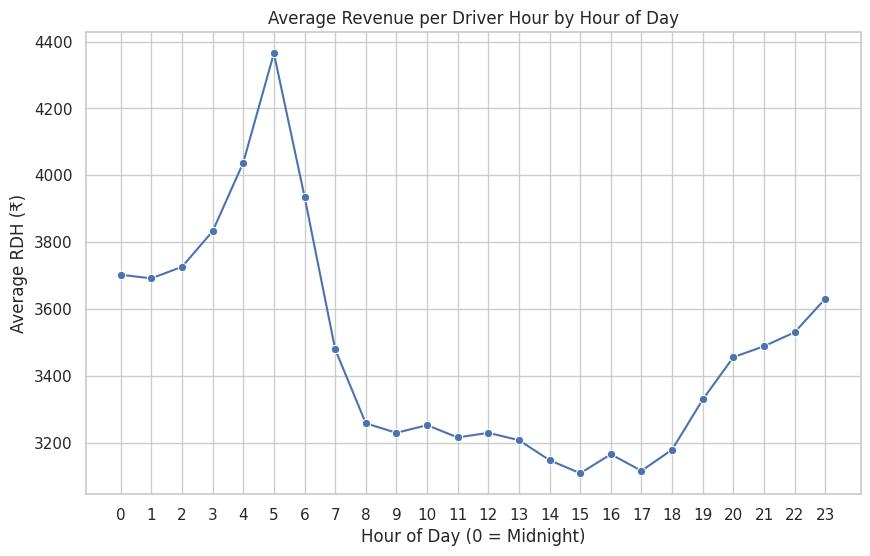

In [18]:
plt.figure(figsize=(10,6))
sns.lineplot(data=hourly_rdh, x='pickup_hour', y='rdh', marker='o')
plt.title('Average Revenue per Driver Hour by Hour of Day')
plt.xlabel('Hour of Day (0 = Midnight)')
plt.ylabel('Average RDH (₹)')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

In [19]:
#counting the frequency of each pickup point to determine the hotspot location
pickup_counts = data['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['PULocationID','pickup_count']

#display top 10 most common pickup locations
pickup_counts.head(10)


,PULocationID,pickup_count
0,237,291979
1,161,280104
2,236,271769
3,162,234211
4,186,228154
5,230,226634
6,132,206217
7,142,192872
8,48,192839
9,170,192339


In [20]:
#finding peak hours for most active PULocationID
peak_hours = data[data['PULocationID'].isin(pickup_counts.head(10)['PULocationID'])]
peak_hours = peak_hours.copy()
peak_hours['pickup_hour'] = peak_hours['tpep_pickup_datetime'].dt.hour

/tmp/ipython-input-1270217514.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=peak_hours, x='pickup_hour', order=range(24), palette='viridis')


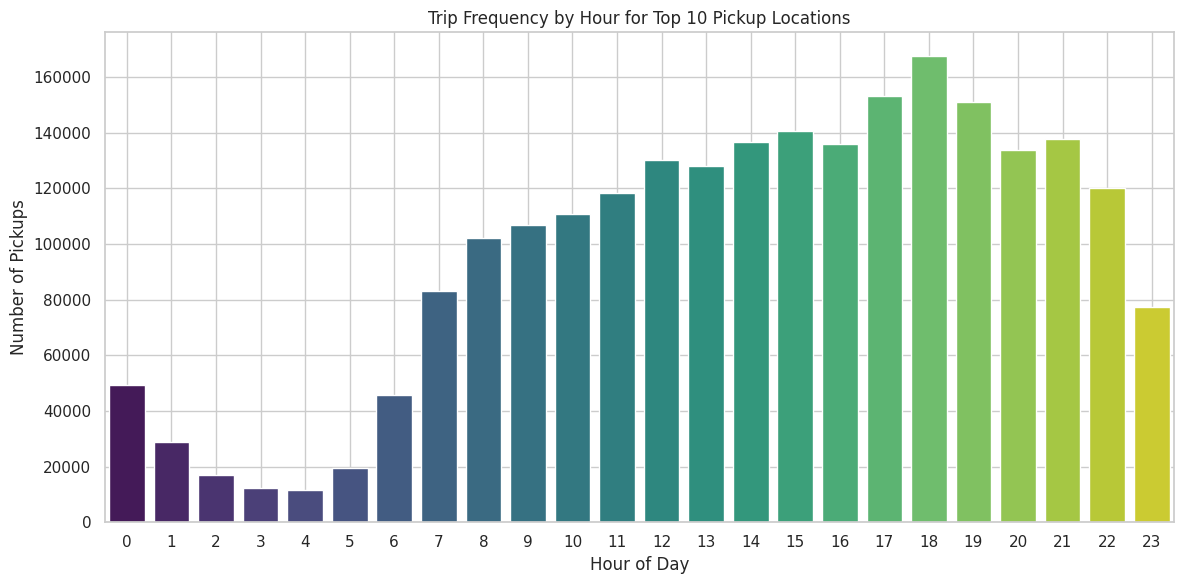

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=peak_hours, x='pickup_hour', order=range(24), palette='viridis')
plt.title("Trip Frequency by Hour for Top 10 Pickup Locations")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Pickups")
plt.xticks(range(24))
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
# avg trip distance of peak hour
avg_distance = peak_hours.groupby('pickup_hour')['trip_distance'].mean().reset_index()
avg_distance.columns = ['pickup_hour', 'avg_distance']


In [23]:
avg_distance.head(24)  # View first 10 rows
print(avg_distance)

    pickup_hour  avg_distance
0             0      7.633462
1             1      6.749045
2             2      6.164484
3             3      6.958543
4             4      8.502609
5             5      9.981524
6             6      6.609647
7             7      5.054382
8             8      4.425693
9             9      4.262207
10           10      4.351446
11           11      4.070595
12           12      4.431724
13           13      5.029523
14           14      5.365461
15           15      5.252889
16           16      5.512342
17           17      4.945040
18           18      4.885954
19           19      5.051824
20           20      5.934025
21           21      5.756899
22           22      6.012746
23           23      6.770654


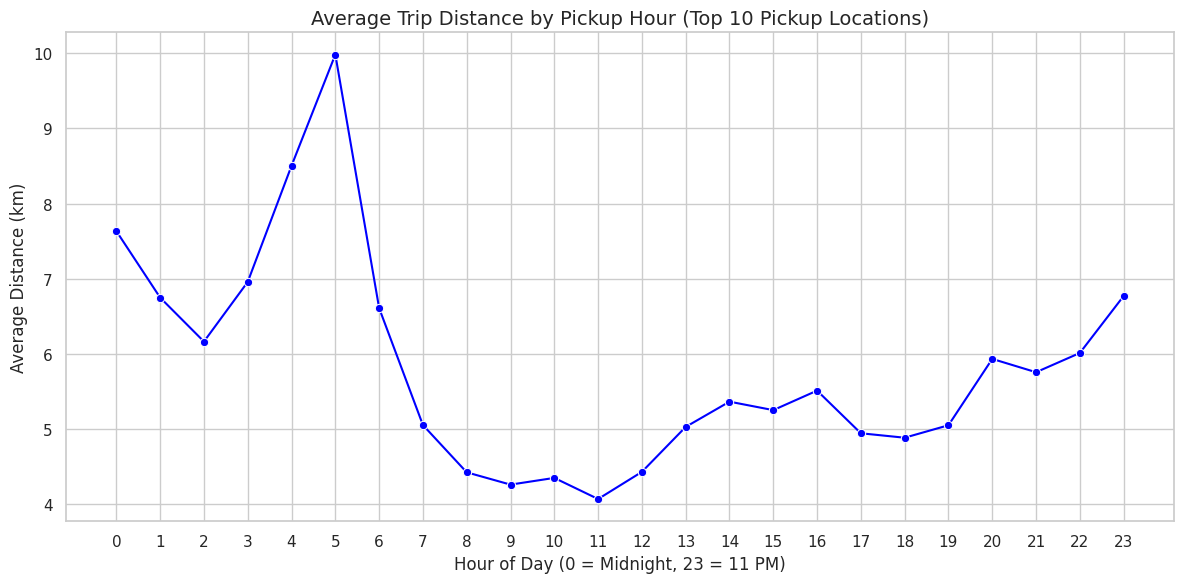

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=avg_distance, x='pickup_hour', y='avg_distance', marker='o', color='blue')

plt.title('Average Trip Distance by Pickup Hour (Top 10 Pickup Locations)', fontsize=14)
plt.xlabel('Hour of Day (0 = Midnight, 23 = 11 PM)', fontsize=12)
plt.ylabel('Average Distance (km)', fontsize=12)
plt.xticks(range(0, 24))  # ensures all hours are shown
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
#distance between drop location vs most active location
dropoff_counts = data['DOLocationID'].value_counts().reset_index()
dropoff_counts.columns = ['DOLocationID','dropoff_count']
dropoff_counts.head(10)

,DOLocationID,dropoff_count
0,236,288636
1,237,263572
2,161,248552
3,170,195446
4,162,193135
5,230,192206
6,142,179742
7,48,169847
8,239,169840
9,141,167457


In [26]:
# Already calculated
pickup_counts = data['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['PULocationID','pickup_count']

# Merge top 10 of both pickup and dropoff
top_pickups = pickup_counts.head(10)
top_dropoffs = dropoff_counts.head(10)

# Merge to see if any locations overlap
comparison = pd.merge(top_pickups, top_dropoffs, left_on='PULocationID', right_on='DOLocationID', how='outer')
comparison


,PULocationID,pickup_count,DOLocationID,dropoff_count
0,48.0,192839.0,48.0,169847.0
1,132.0,206217.0,NaN,NaN
2,NaN,NaN,141.0,167457.0
3,142.0,192872.0,142.0,179742.0
4,161.0,280104.0,161.0,248552.0
5,162.0,234211.0,162.0,193135.0
6,170.0,192339.0,170.0,195446.0
7,186.0,228154.0,NaN,NaN
8,230.0,226634.0,230.0,192206.0
9,236.0,271769.0,236.0,288636.0


/tmp/ipython-input-899509116.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overlapping_zones['PULocationID'] = overlapping_zones['PULocationID'].astype(int)


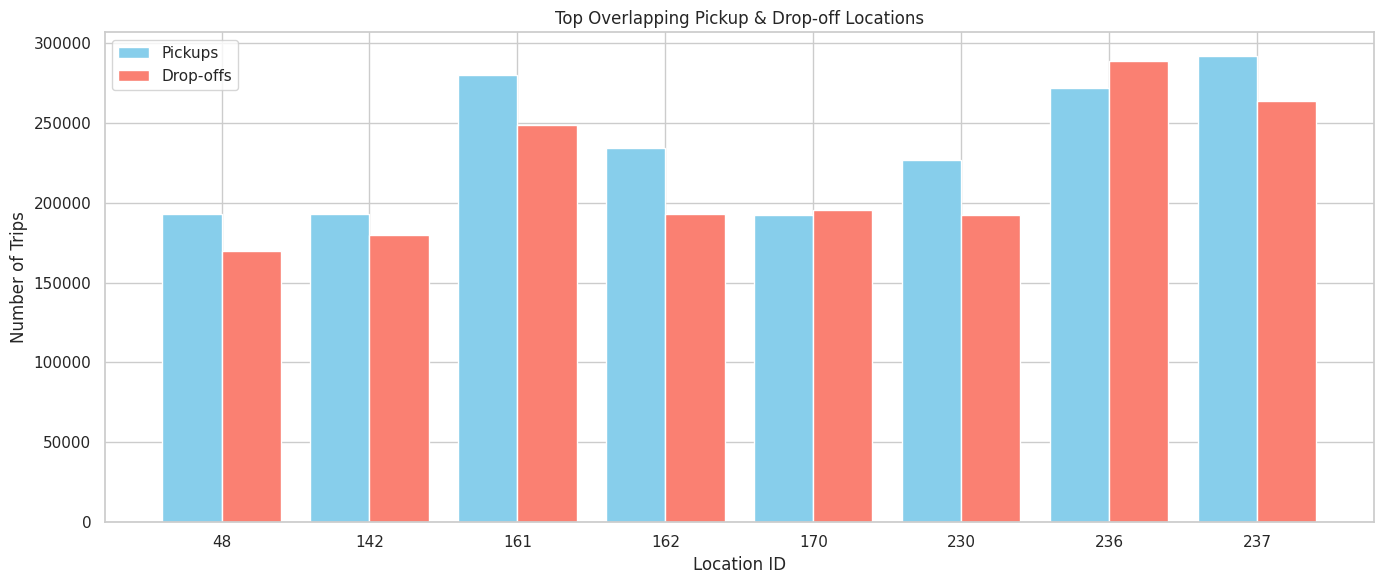

In [27]:
# Filter overlapping zones
overlapping_zones = comparison.dropna()

# For clarity, convert PULocationID to int
overlapping_zones['PULocationID'] = overlapping_zones['PULocationID'].astype(int)

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))
bar_width = 0.4
x = range(len(overlapping_zones))

plt.bar([i - bar_width/2 for i in x], overlapping_zones['pickup_count'],
        width=bar_width, label='Pickups', color='skyblue')
plt.bar([i + bar_width/2 for i in x], overlapping_zones['dropoff_count'],
        width=bar_width, label='Drop-offs', color='salmon')

# Add labels
plt.xticks(x, overlapping_zones['PULocationID'].astype(int))
plt.xlabel('Location ID')
plt.ylabel('Number of Trips')
plt.title('Top Overlapping Pickup & Drop-off Locations')
plt.legend()
plt.tight_layout()
plt.show()


In [28]:
# Ensure datetime format
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

# Trip duration in hours
data['trip_duration_hours'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 3600


In [29]:
# Extract pickup hour
data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour

# Group by pickup hour
rdh_hourly = data.groupby('pickup_hour').agg(
    total_revenue=('total_amount', 'sum'),
    total_hours=('trip_duration_hours', 'sum'),
    avg_distance=('trip_distance', 'mean'),
    trip_count=('total_amount', 'count')
).reset_index()


# Rename columns
rdh_hourly.columns = ['pickup_hour', 'total_revenue', 'total_hours', 'avg_distance', 'trip_count']

# Calculate RDH
rdh_hourly['RDH'] = rdh_hourly['total_revenue'] / rdh_hourly['total_hours']
rdh_hourly.head()


,pickup_hour,total_revenue,total_hours,avg_distance,trip_count,RDH
0,0,1.579131e+08,46767.463056,5.547335,173943,3376.558885
1,1,1.075734e+08,33181.474722,5.047624,125838,3241.971425
2,2,7.639069e+07,24038.603889,4.899020,91902,3177.833864
3,3,5.523555e+07,17018.210556,5.381636,63815,3245.673243
4,4,4.572135e+07,12986.403889,6.767861,46149,3520.709335


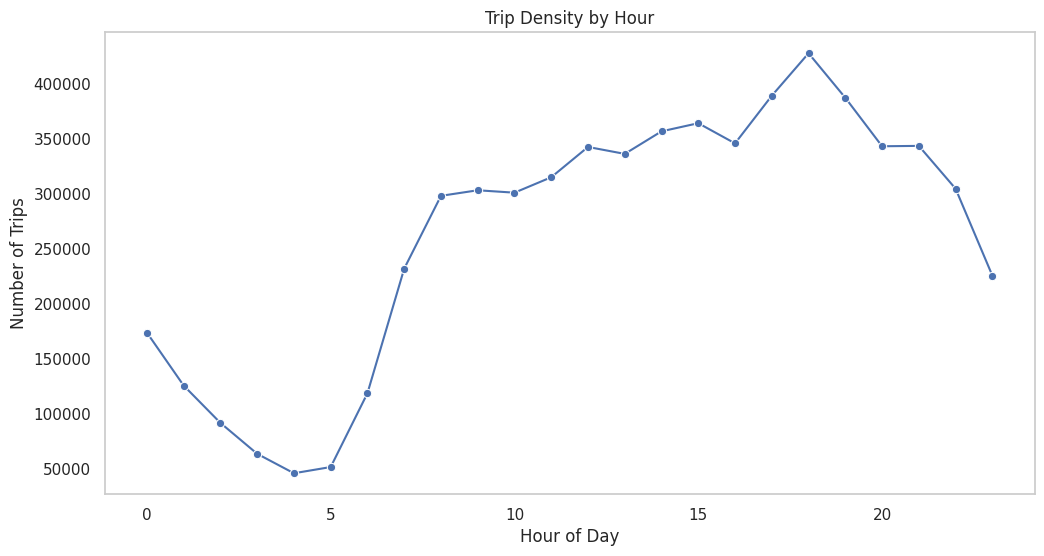

In [30]:
hourly_trips = data['pickup_hour'].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.lineplot(x=hourly_trips.index, y=hourly_trips.values, marker='o')
plt.title('Trip Density by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.grid()
plt.show()


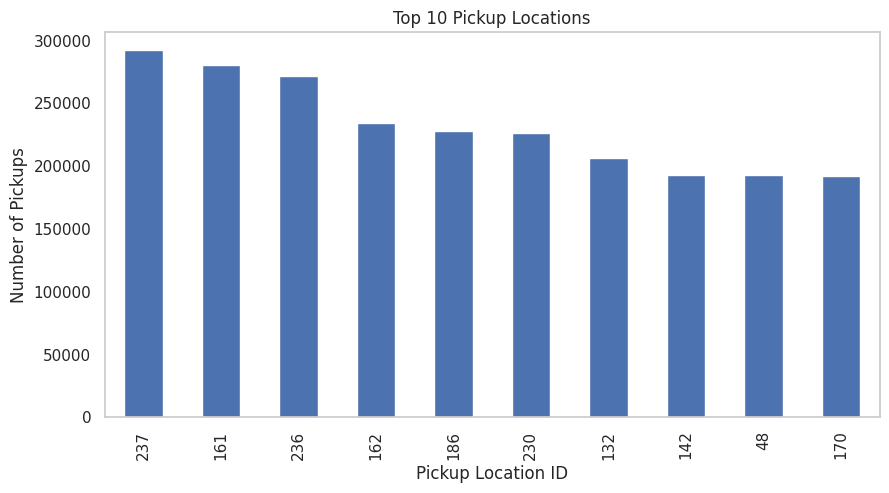

In [31]:
#  locations with low pickup counts → possible oversupply of drivers.
pickup_counts = data['PULocationID'].value_counts().head(10)
pickup_counts.plot(kind='bar', figsize=(10,5))
plt.title('Top 10 Pickup Locations')
plt.xlabel('Pickup Location ID')
plt.ylabel('Number of Pickups')
plt.grid()
plt.show()


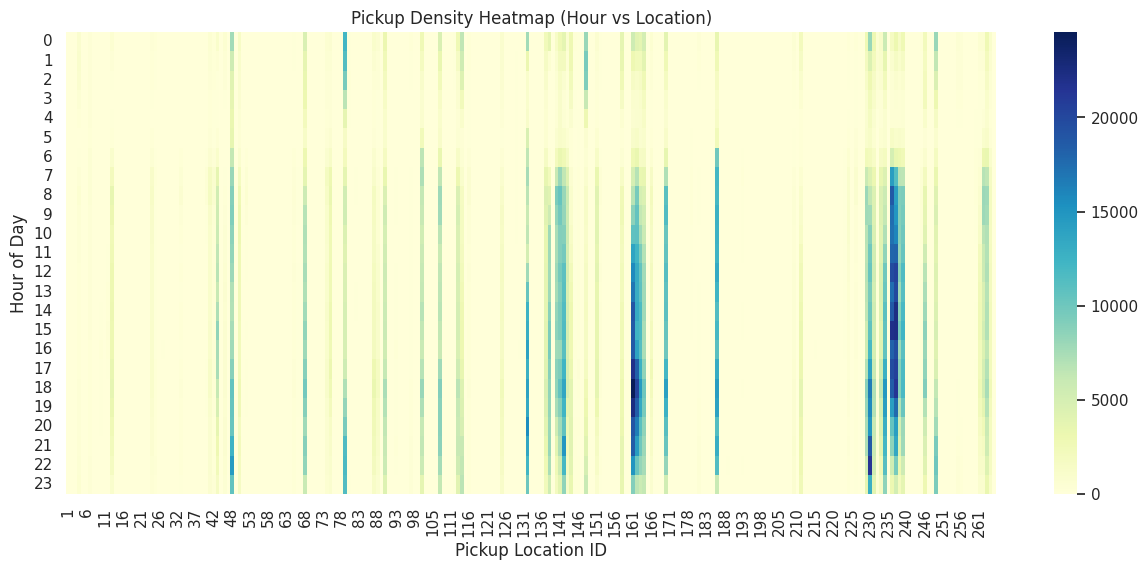

In [32]:
# dentify which locations and what times are most underutilized.
heatmap_data = data.groupby(['pickup_hour', 'PULocationID']).size().unstack(fill_value=0)
plt.figure(figsize=(15,6))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Pickup Density Heatmap (Hour vs Location)')
plt.xlabel('Pickup Location ID')
plt.ylabel('Hour of Day')
plt.show()


In [33]:
data.to_csv('uber_bangalore_cleaned.csv', index=False)

In [34]:
from google.colab import files
files.download('uber_bangalore_cleaned.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>